In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')

In [ ]:
base_dir=r"/content/drive/MyDrive/CSE428 (1)/Group_4/train"

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64 # in every epoch how many images we will be working with

#augmentation using keras
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator( # by applying these preprocessing we will be getting 3 images from one image.
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1944 images belonging to 5 classes.
Found 216 images belonging to 5 classes.


In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='selu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',strides=2,kernel_size=3,activation='tanh'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(5,activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 16)         

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(
    train_datagen,
    steps_per_epoch=train_datagen.samples // BATCH_SIZE,
    epochs=50,
    validation_data=test_datagen,
    validation_steps=test_datagen.samples // BATCH_SIZE
)


test_loss, test_accuracy = cnn.evaluate(test_datagen)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

for epoch, acc in enumerate(history.history['accuracy'], 1):
    print(f'Epoch {epoch} - Training Accuracy: {acc * 100:.2f}%')

Epoch 1/50
30/30 [==============================] - 33s 1s/step - loss: 1.5623 - accuracy: 0.2793 - val_loss: 1.4924 - val_accuracy: 0.3802
Epoch 2/50
30/30 [==============================] - 28s 947ms/step - loss: 1.4265 - accuracy: 0.4074 - val_loss: 1.3042 - val_accuracy: 0.4427
Epoch 3/50
30/30 [==============================] - 28s 950ms/step - loss: 1.3128 - accuracy: 0.4686 - val_loss: 1.1772 - val_accuracy: 0.5156
Epoch 4/50
30/30 [==============================] - 28s 944ms/step - loss: 1.2086 - accuracy: 0.5293 - val_loss: 1.0933 - val_accuracy: 0.6042
Epoch 5/50
30/30 [==============================] - 27s 911ms/step - loss: 1.1249 - accuracy: 0.5713 - val_loss: 1.0730 - val_accuracy: 0.5781
Epoch 6/50
30/30 [==============================] - 28s 906ms/step - loss: 1.1193 - accuracy: 0.5750 - val_loss: 1.0451 - val_accuracy: 0.5990
Epoch 7/50
30/30 [==============================] - 28s 917ms/step - loss: 1.0464 - accuracy: 0.5936 - val_loss: 1.0265 - val_accuracy: 0.6042
Ep

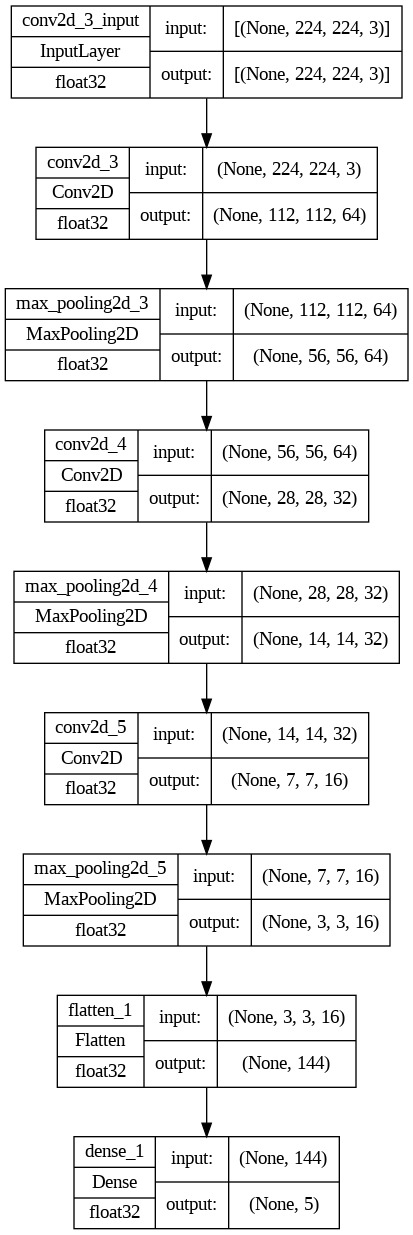

In [ ]:
tf.keras.utils.plot_model(cnn, show_shapes=True, show_dtype=True, show_layer_names=True)

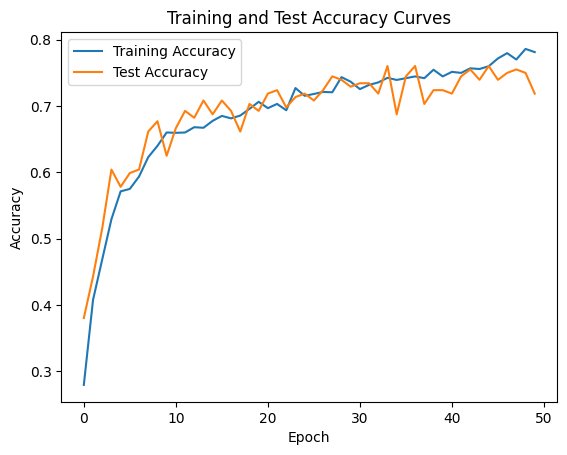

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Calculate confusion matrix and classification report
Y_pred = cnn.predict(test_datagen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_datagen.classes
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=test_datagen.class_indices)

4/4 [==============================] - 1s 168ms/step


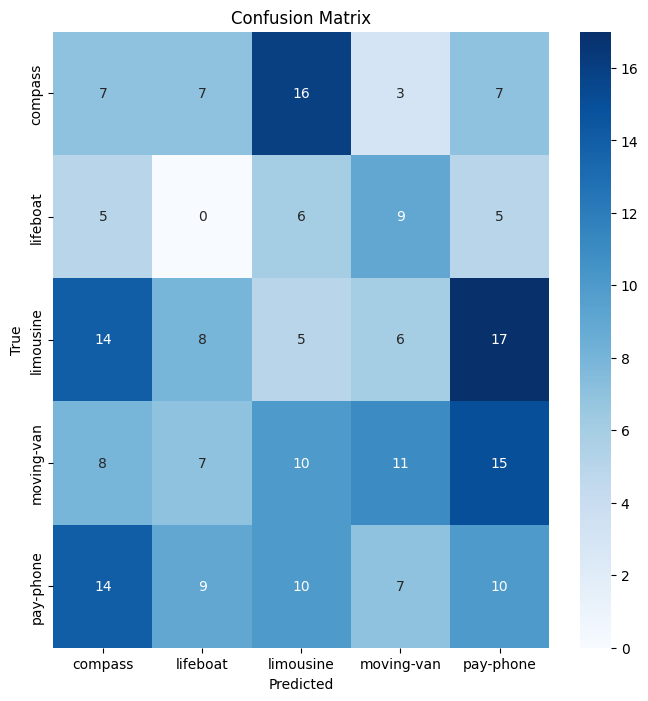

In [ ]:
# Display confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_datagen.class_indices.keys(),
            yticklabels=test_datagen.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Display classification report
print(class_report)

              precision    recall  f1-score   support

     compass       0.15      0.17      0.16        40
    lifeboat       0.00      0.00      0.00        25
   limousine       0.11      0.10      0.10        50
  moving-van       0.31      0.22      0.25        51
   pay-phone       0.19      0.20      0.19        50

    accuracy                           0.15       216
   macro avg       0.15      0.14      0.14       216
weighted avg       0.17      0.15      0.16       216




Number of Misclassified Images: 183


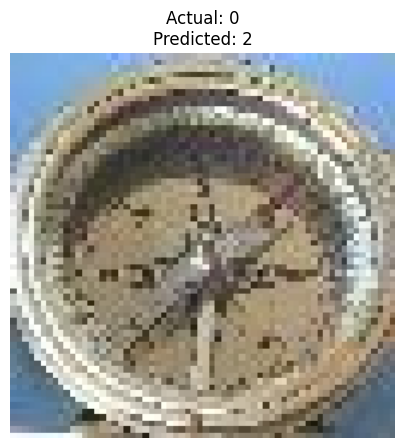

In [ ]:
misclassified_indices = np.where(y_pred != y_true)[0]
num_misclassified = len(misclassified_indices)

print(f"\nNumber of Misclassified Images: {num_misclassified}")

# Display some misclassified images along with their actual labels
plt.figure(figsize=(15, 5))
for i in range(min(5, num_misclassified)):
    index = misclassified_indices[i]
    img = image.load_img(test_datagen.filepaths[index], target_size=(224, 224))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {test_datagen.classes[index]}\nPredicted: {y_pred[index]}")
    plt.axis('off')

plt.show()